<a href="https://colab.research.google.com/github/ashishkumargoyal/-ashish_simple_multiple-linear-regression-_concrete-data.i/blob/main/Ashish_Decision_Tree_Emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/content/emails.csv')

In [22]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1111,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,2222,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3333,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,4444,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Identify numerical and string columns
num_cols = df.select_dtypes(include='number').columns
str_cols = df.select_dtypes(include='object').columns

In [19]:
print("Numerical columns:")
print(num_cols)
print("\nString columns:")
print(str_cols)

Numerical columns:
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

String columns:
Index([], dtype='object')


In [20]:
label_encoder = preprocessing.LabelEncoder()
df['Email No.']= label_encoder.fit_transform(df['Email No.'])

In [21]:
print("Numerical columns:")
print(num_cols)
print("\nString columns:")
print(str_cols)

Numerical columns:
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

String columns:
Index([], dtype='object')


In [23]:
#Define feature variables x and y
# Drop the original 'Label' and the encoded label to avoid data leakage
x = df.drop(['Email No.','Prediction'], axis=1) # Pass a list of column names to drop
y = df['Prediction']

In [24]:
x

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [25]:
y

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
5167,0
5168,0
5169,1
5170,1


In [26]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [27]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [28]:
x_train

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
2363,0,2,2,1,0,0,79,2,0,6,...,0,0,0,0,1,0,0,0,3,0
1030,8,19,18,7,3,3,150,8,11,23,...,0,0,0,0,2,0,0,0,2,0
3868,1,3,2,0,4,0,19,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3128,12,9,1,1,2,3,36,0,0,8,...,0,0,0,0,0,0,0,0,2,0
4137,1,2,2,0,1,0,24,1,1,8,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,6,5,5,3,9,0,85,5,1,2,...,0,0,0,0,0,0,0,0,0,0
3340,8,7,8,1,2,3,37,0,3,6,...,0,0,0,0,0,0,0,0,2,0
3064,2,0,1,0,0,1,5,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [29]:
y_train

,Prediction
2363,1
1030,0
3868,0
3128,0
4137,0
...,...
3603,1
4722,0
3340,0
3064,1


In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

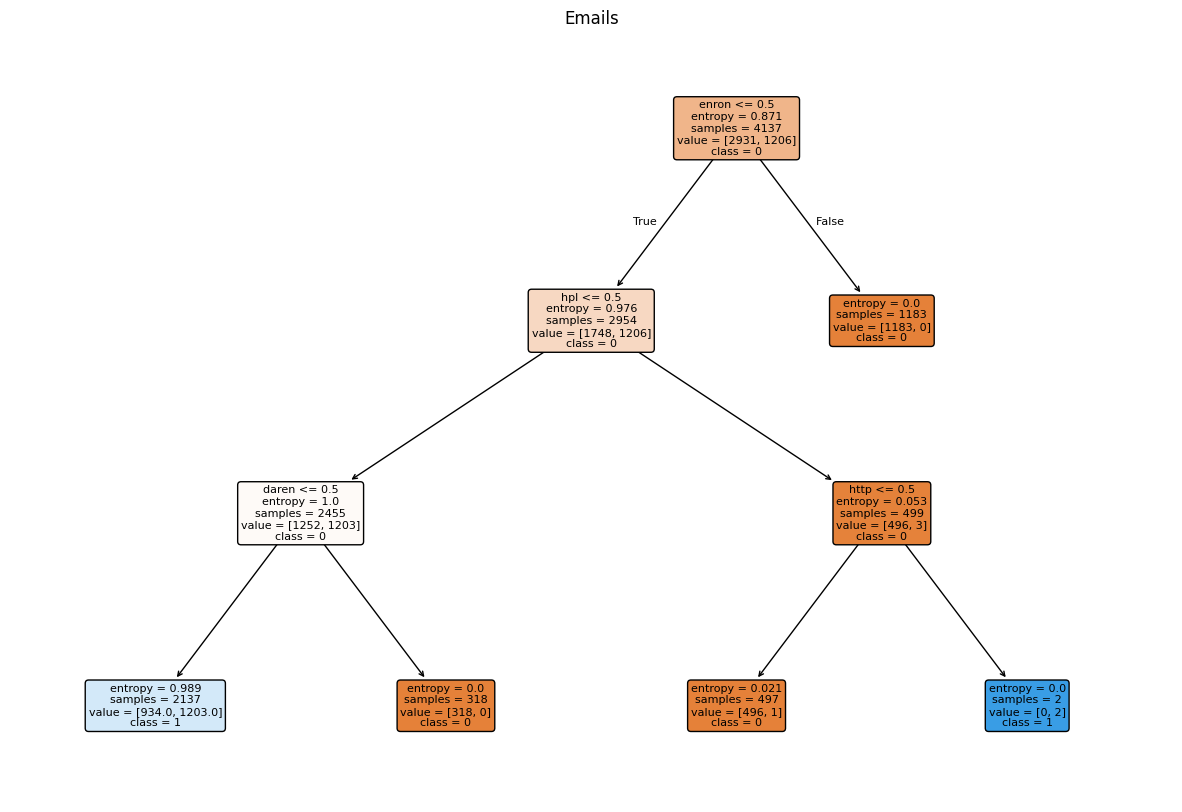

In [36]:
# Assuming 'x' contains your feature data
plt.figure(figsize=(15, 10))
plot_tree(model,
          feature_names=x.columns,
          class_names=['0','1'],
          filled=True, rounded=True,fontsize = 8)
plt.title("Emails")
plt.show()